In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from market_analytics import load_and_preprocess_data, calculate_hpdr_bands

sns.set_theme()

In [2]:
data_path = Path("..", "data", "Kraken_OHLCVT")

In [3]:
filenames = ["XBTUSD_1440", "ETHUSD_1440", "SOLUSD_1440"]

In [4]:
dataframes = []

for filename in filenames:
    df = load_and_preprocess_data(data_path / (filename + ".csv"), add_return_pct=True)
    dataframes.append(df)

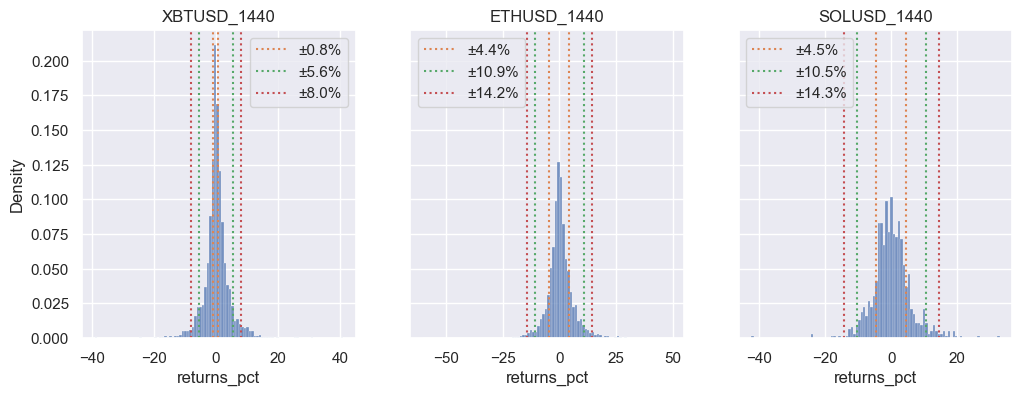

In [5]:
fig, ax = plt.subplots(ncols=len(dataframes), figsize=(12, 4), sharey="row")

bins = 100
stat = "density"
x = "returns_pct"
hpdr_percents = [0.5, 0.9, 0.95]

for idx, df in enumerate(dataframes):
    ax[idx].set_title(filenames[idx])
    sns.histplot(df, x=x, ax=ax[idx], stat=stat, bins=bins)

    hpdr_bands = calculate_hpdr_bands(df[x], bins, hpdr_percents)
    for idx2, percent_range in enumerate(hpdr_bands):
        ax[idx].axvline(percent_range, color=f"C{idx2 + 1}",
                        label=f"±{percent_range:.1f}%", ls="dotted")
        ax[idx].axvline(-percent_range, color=f"C{idx2 + 1}", ls="dotted")

    ax[idx].legend()

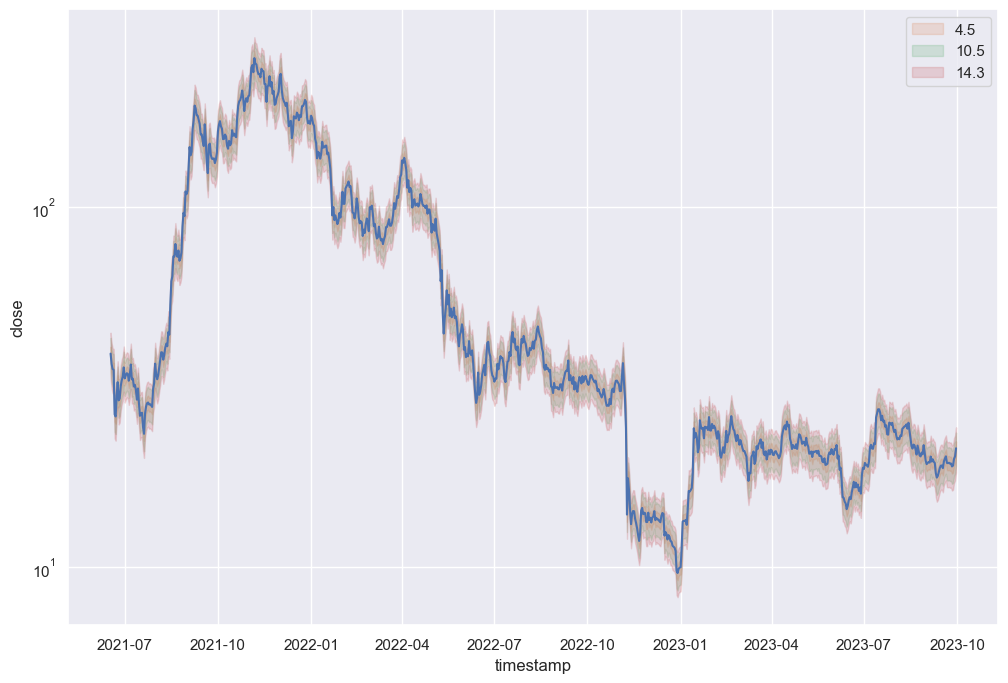

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
df_sol = dataframes[-1]
sns.lineplot(df_sol, x="timestamp", y="close", ax=ax)

for idx, band in enumerate(hpdr_bands):
    ax.fill_between(
        x=df_sol.index,
        y1=df_sol["close"] + band / 100 * df_sol["close"],
        y2=df_sol["close"] - band / 100 * df_sol["close"],
        alpha=0.2,
        color=f"C{idx + 1}",
        label=f"{band:.1f}"
    )
ax.set_yscale("log")
ax.legend()